Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



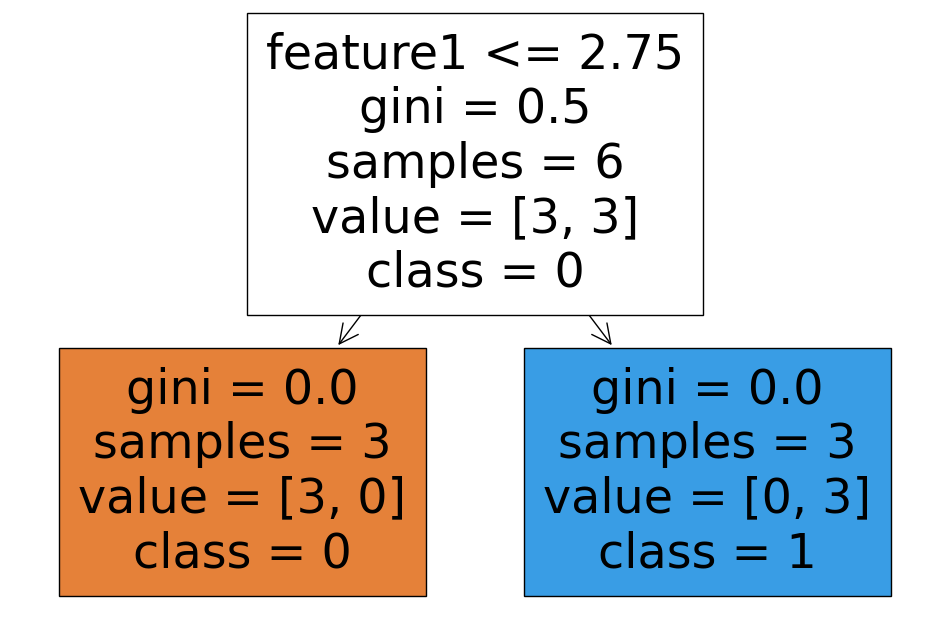

|--- feature1 <= 2.75
|   |--- class: 0
|--- feature1 >  2.75
|   |--- class: 1



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'feature1': [2.5, 3.6, 1.8, 3.1, 3.0, 2.1, 1.5, 3.2],
    'feature2': [1.5, 2.1, 1.8, 2.2, 2.0, 1.9, 1.4, 2.1],
    'target': [0, 1, 0, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Splitting the data into training and testing sets
X = df[['feature1', 'feature2']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualizing the decision tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=['feature1', 'feature2'], class_names=['0', '1'], filled=True)
plt.show()

# Text representation of the tree
tree_text = export_text(model, feature_names=['feature1', 'feature2'])
print(tree_text)
